In [1]:
# Compare the temp resp of v8 vs v9
# nb this is the difference in the emissivities (CHIANTI), nothing to do with
# the degradation stuff
# 
# 15-Sep-202 IGH

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import time
from astropy.visualization import time_support
from astropy.time import TimeDelta
import astropy.units as u
import scipy.io as io

import warnings
warnings.simplefilter('ignore')

In [3]:
# from make_aiaresp_forpy
#  aia_get_response(/temp,/dn,/eve,version=8)
#  aia_get_response(/temp,/dn,/eve,version=9)

trinv8=io.readsav('aia_trespv8_en.dat')
trinv9=io.readsav('aia_trespv9_en.dat')

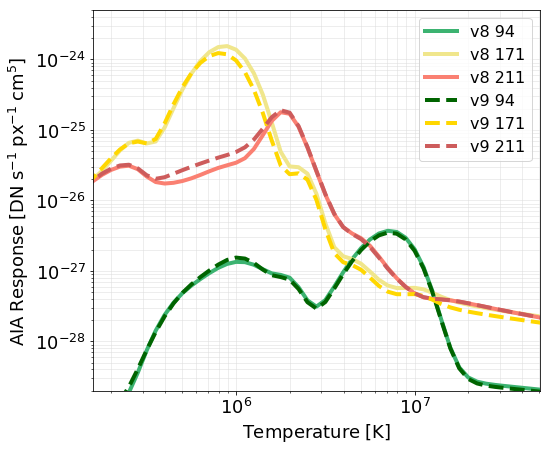

In [4]:
logt=trinv8['logt']
trv8094=trinv8['tr'][0]
trv8171=trinv8['tr'][2]
trv8211=trinv8['tr'][4]

trv9094=trinv9['tr'][0]
trv9171=trinv9['tr'][2]
trv9211=trinv9['tr'][4]

clrsv8=['mediumseagreen','darkcyan','khaki','sienna',\
      'salmon','darkslateblue','cornflowerblue']
clrsv9=['darkgreen','darkcyan','gold','sienna',\
      'indianred','darkslateblue','cornflowerblue']

plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8, 7))
plt.loglog(10**logt,trv8094,label='v8 94',color=clrsv8[0],lw=4)
plt.loglog(10**logt,trv8171,label='v8 171',color=clrsv8[2],lw=4)
plt.loglog(10**logt,trv8211,label='v8 211',color=clrsv8[4],lw=4)
plt.loglog(10**logt,trv9094,label='v9 94',color=clrsv9[0],lw=4,ls='dashed')
plt.loglog(10**logt,trv9171,label='v9 171',color=clrsv9[2],lw=4,ls='dashed')
plt.loglog(10**logt,trv9211,label='v9 211',color=clrsv9[4],lw=4,ls='dashed')
plt.xlabel('$\mathrm{Temperature\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim([2e-29,5e-24])
plt.xlim([10**5.2,10**7.7])
plt.legend(ncol=1,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()

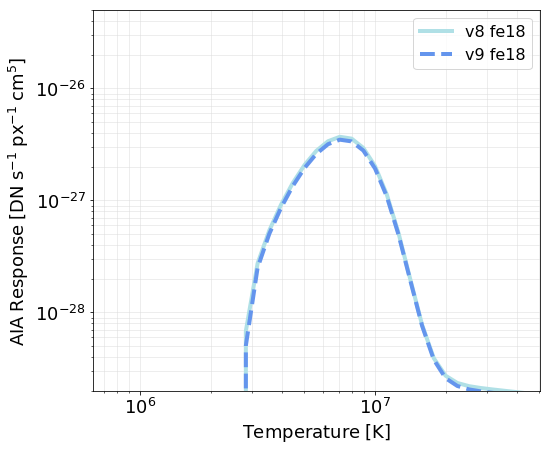

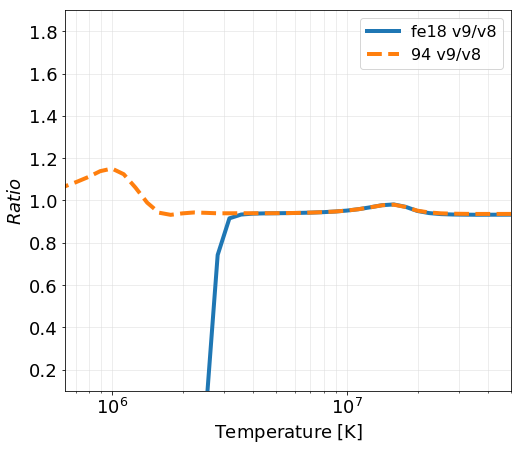

[0.9375556]


In [7]:
fe18v8=trv8094 - trv8171/450. - trv8211/120.
fe18v9=trv9094 - trv9171/450. - trv9211/120.


plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8, 7))
plt.loglog(10**logt,fe18v8,label='v8 fe18',color='powderblue',lw=4)
plt.loglog(10**logt,fe18v9,label='v9 fe18',color='cornflowerblue',lw=4,ls='dashed')
plt.xlabel('$\mathrm{Temperature\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim([2e-29,5e-26])
plt.xlim([10**5.8,10**7.7])
plt.legend(ncol=1,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()

rat=fe18v9/fe18v8
rat[fe18v9 < 0]=0

fig = plt.figure(figsize=(8, 7))
plt.plot(10**logt,rat,label='fe18 v9/v8',lw=4)
plt.plot(10**logt,trv9094/trv8094,label='94 v9/v8',lw=4,ls='dashed')
plt.xlabel('$\mathrm{Temperature\;[K]}$')
plt.ylabel('$Ratio$')
plt.ylim([0.1,1.9])
plt.xlim([10**5.8,10**7.7])
plt.xscale('log')
plt.legend(ncol=1,prop={'size': 16})
plt.grid(True,which='both',lw=0.5,color='gainsboro')
plt.show()
print(rat[logt == 6.6])